# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter

# Dataset 

In [2]:
df = pd.read_csv('Dataset/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Shape of the Dataset

In [3]:
df.shape

(299, 13)

## Info

In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Checking Null Values

In [5]:
# checking for null values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# the above output describes that there are no null values in the entire dataset, so we don't have to check column-wise

In [7]:
df['age'].info()     # example to check info of a specific column

<class 'pandas.core.series.Series'>
RangeIndex: 299 entries, 0 to 298
Series name: age
Non-Null Count  Dtype  
--------------  -----  
299 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


## Data Types of dataset columns

In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Changing 'DEATH_EVENT' into lower_case

In [10]:
col_names = [x.lower() for x in df.columns]
df.columns = col_names
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

# Summary Satistics

In [11]:
imp_stats = df.describe()
imp_stats

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Visualizing Distribution

### AGE

In [12]:
# Histogram for 'age'
fig_age_hist = px.histogram(df, x='age', nbins=30, title="Age Distribution")
# Update title alignment to center
fig_age_hist.update_layout(
    title=dict(
        text="Age Distribution",
        x=0.5,  # x=0.5 centers the title
        xanchor='center'  # Align title to center
    )
)
# Show the plot
fig_age_hist.show()


# Box Plot for 'age'
fig_age_box = px.box(df, y='age', title="Age Box Plot")
# Update title alignment to center
fig_age_box.update_layout(
    title=dict(
        text="Age Box Plot",
        x=0.5,  # x=0.5 centers the title
        xanchor='center'  # Align title to center
    )
)
fig_age_box.show()

THERE ARE `NO OUTLIERS` IN AGE

## Correlation

In [13]:
# Correlation between variables
corr = df.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


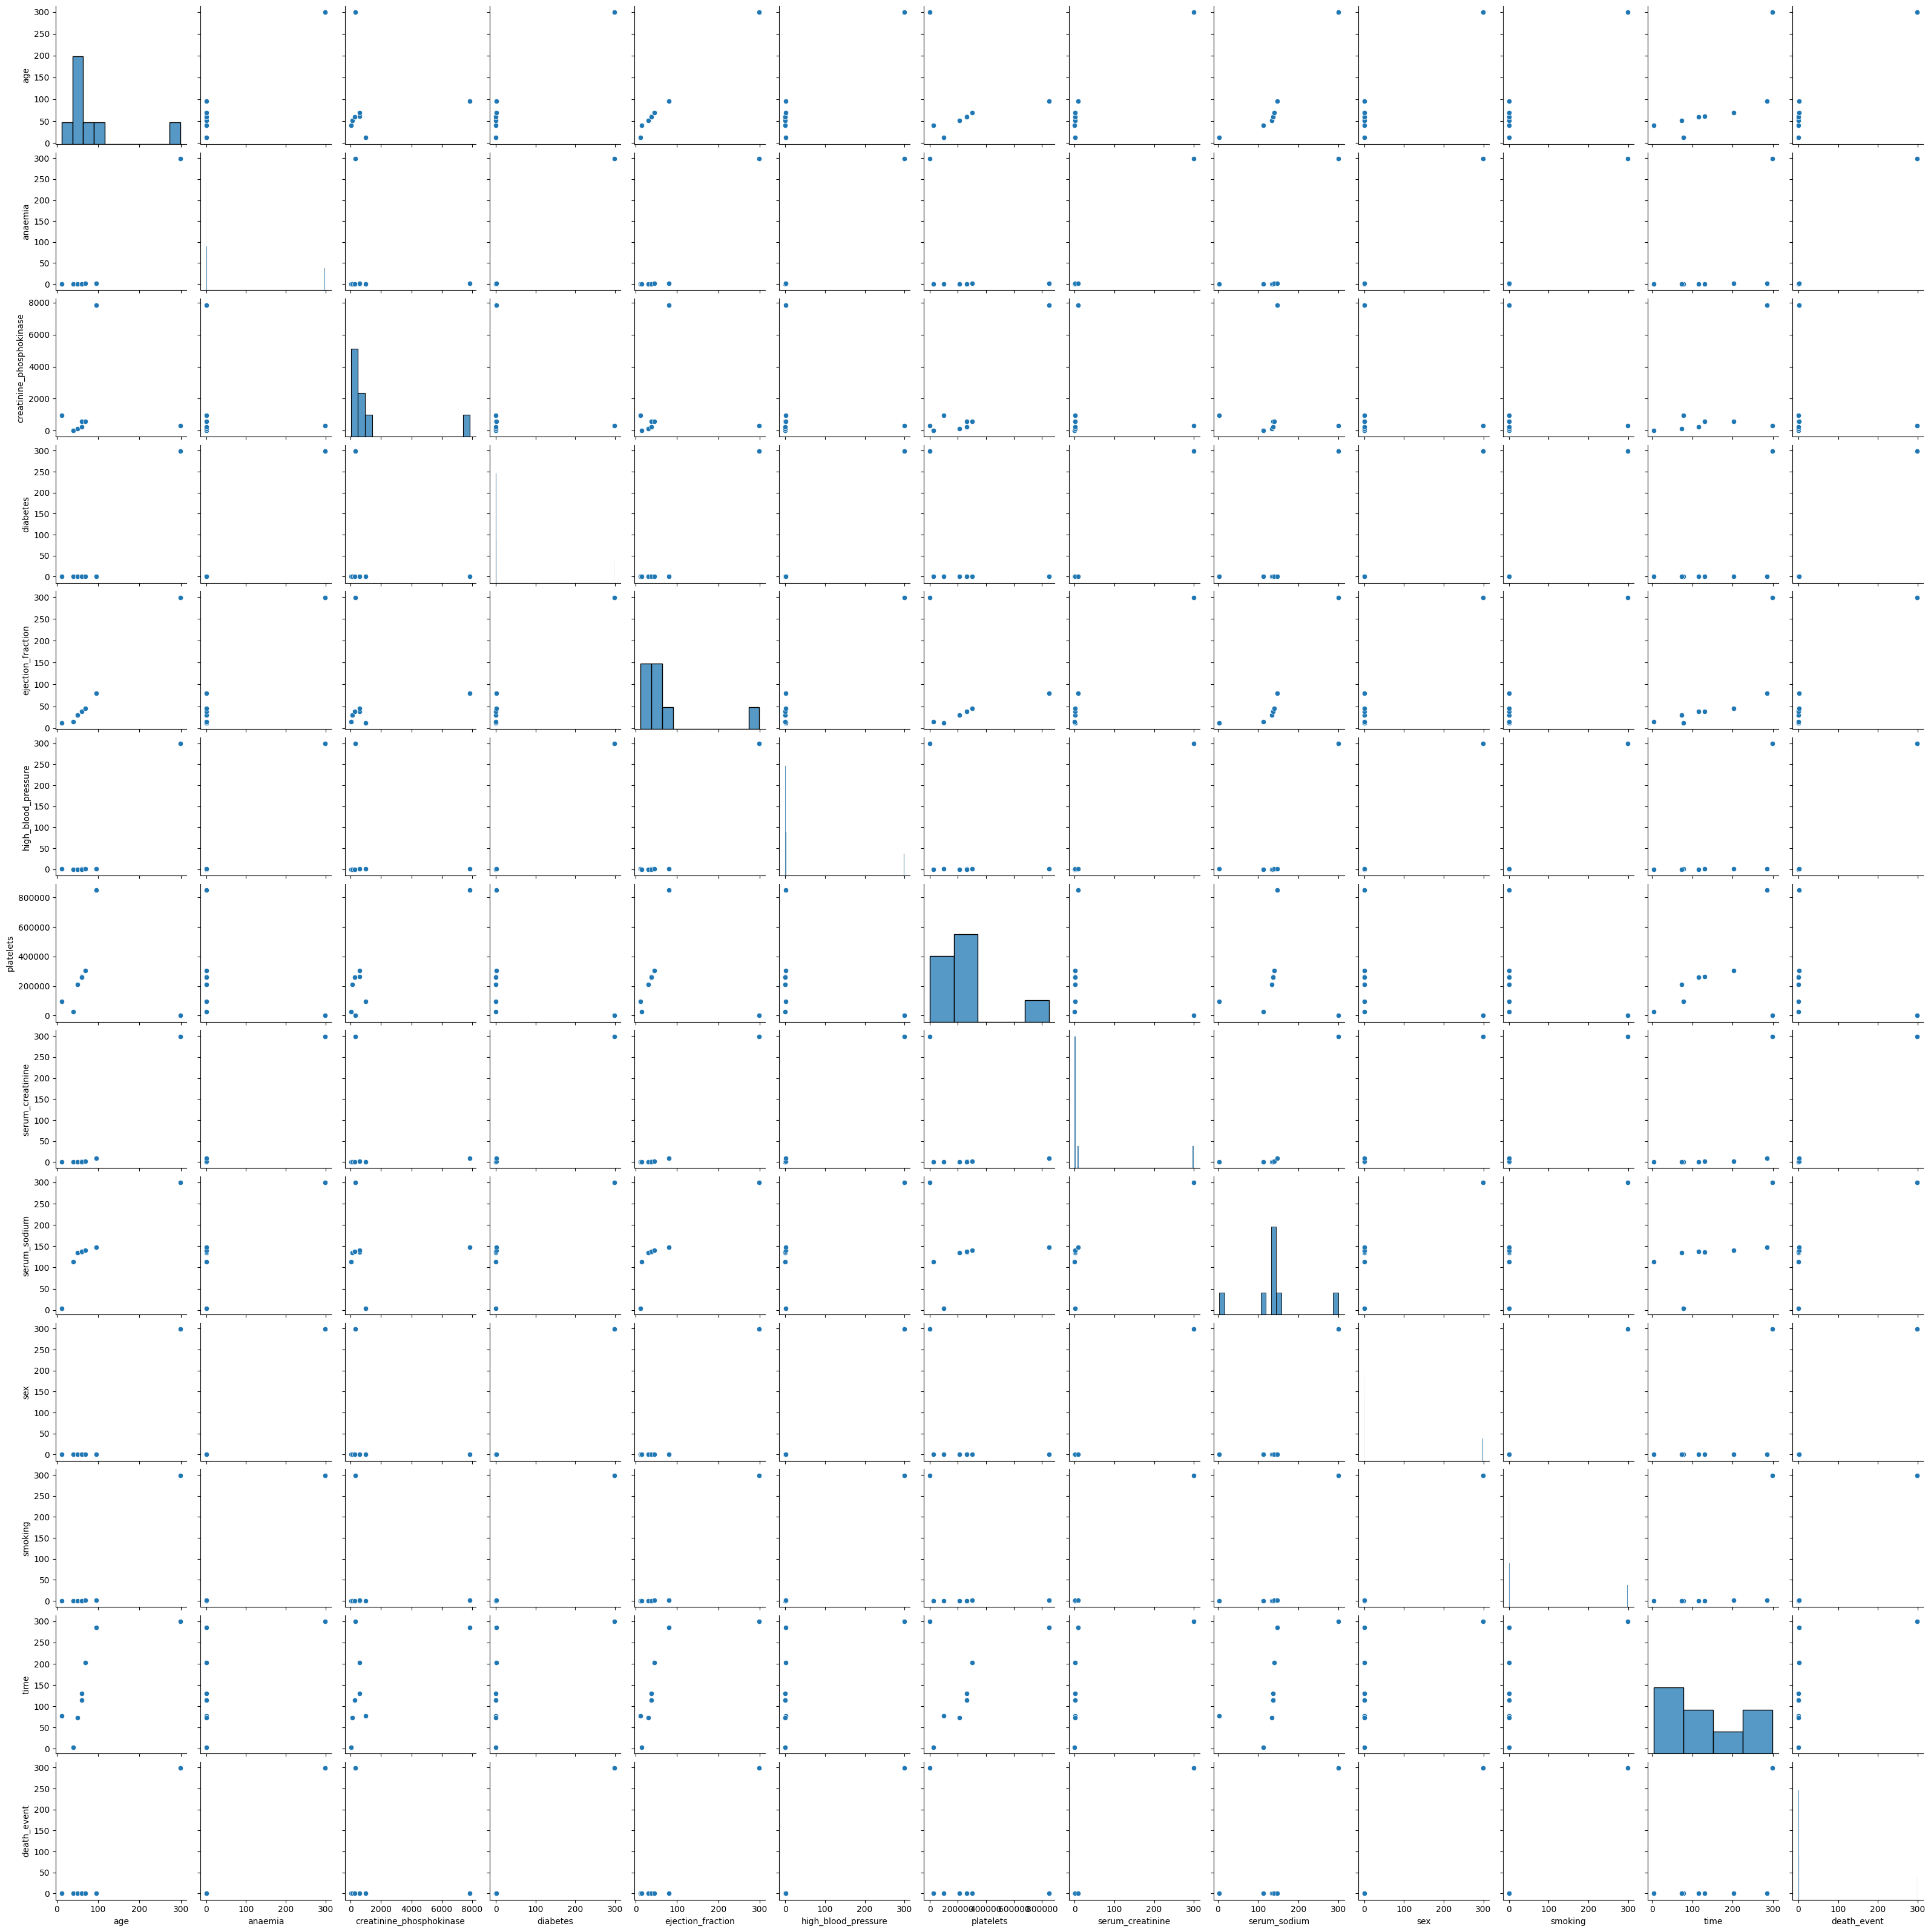

In [14]:
sns.pairplot(imp_stats)
plt.show()

**Correlation Heatmap**

In [15]:
# Create the heatmap
heatmap = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.index,
        colorscale="Viridis",
        colorbar=dict(title="Correlation")
    )
)

# Update layout for better readability and center the title
heatmap.update_layout(
    title=dict(
        text="Correlation Heatmap",  # Title text
        x=0.5,                       # Center the title
        xanchor="center"             # Anchor the title to the center
    ),
    xaxis_title="Variables",
    yaxis_title="Variables"
)

# Show the heatmap
heatmap.show()


In [16]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=df['time'], event_observed=df['death_event'])

# Extract survival function
survival_df = kmf.survival_function_.reset_index()
survival_df.columns = ['Time', 'Survival Probability']

# Create the plot
fig = px.line(
    survival_df,
    x='Time',
    y='Survival Probability',
    title='Kaplan-Meier Survival Curve',
    labels={'Time': 'Time (days)', 'Survival Probability': 'Probability'},
    template='plotly'
)

# Update layout
fig.update_layout(
    xaxis=dict(title='Time (days)'),
    yaxis=dict(title='Survival Probability', range=[0, 1])
)
# Update layout with centered title
fig.update_layout(
    title=dict(
        text='Kaplan-Meier Survival Curve',
        x=0.5,  # Center alignment (0 is left, 1 is right)
        xanchor='center'
    ),
    xaxis=dict(title='Time (days)'),
    yaxis=dict(title='Survival Probability', range=[0, 1])
)


# Show the plot
fig.show()

In [17]:
# Create the box plot
fig = px.box(
    df,
    x="death_event",
    y="creatinine_phosphokinase",
    color="death_event",
    labels={"death_event": "Survival Status", "creatinine_phosphokinase": "CPK Levels (mcg/L)"},
    title="CPK Levels by Survival Status",
    color_discrete_map={0: "blue", 1: "red"}  # Assign colors for survival (0) and death (1)
)

# Update layout for better visualization
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Survived', 'Died']
    ),
    yaxis=dict(title="Creatinine Phosphokinase (mcg/L)"),
    title=dict(text="CPK Levels by Survival Status", x=0.5, xanchor="center"),
    boxmode="group"
)

# Show the plot
fig.show()

Patients who died seem to have a higher range and `more extreme outliers` in CPK levels compared to those who survived.

In [18]:
# Create the scatter plot
fig = px.scatter(
    df,
    x="age",
    y="ejection_fraction",
    color="death_event",
    labels={
        "age": "Age (years)",
        "ejection_fraction": "Ejection Fraction (%)",
        "death_event": "Mortality Status"
    },
    title="Ejection Fraction vs. Age Colored by Mortality Status",
    color_discrete_map={0: "blue", 1: "red"},  # Survived (blue) and Died (red)
    hover_data=["creatinine_phosphokinase", "serum_creatinine", "serum_sodium"]  # Add additional info on hover
)

# Update layout
fig.update_layout(
    title=dict(text="Ejection Fraction vs. Age Colored by Mortality Status", x=0.5, xanchor="center"),
    xaxis=dict(title="Age (years)"),
    yaxis=dict(title="Ejection Fraction (%)"),
    legend_title="Mortality Status"
)

# Show the plot
fig.show()

Individuals with `higher ejection fractions (above 40%)` are more likely to have `survived` (purple dots).
`Lower ejection fractions (below 40%)` are more commonly associated with individuals who `died` (yellow dots).
A combination of `low ejection fraction and any age` seems to be associated with a `higher risk of mortality.`

In [19]:
# Gender-Based Mortality Analysis
gender_mortality = df.groupby(['sex', 'death_event']).size().reset_index(name='count')

# Map genders for better readability (optional)
gender_mortality['sex'] = gender_mortality['sex'].map({0: 'Female', 1: 'Male'})
gender_mortality['death_event'] = gender_mortality['death_event'].map({0: 'No', 1: 'Yes'})

# Create the Plotly grouped bar chart
fig = px.bar(
    gender_mortality,
    x='sex',
    y='count',
    color='death_event',
    barmode='group',
    labels={'sex': 'Gender', 'count': 'Count', 'death_event': 'Death Event'},
    title='Gender-Based Mortality'
)
# Center the title
fig.update_layout(
    title=dict(
        text='Gender-Based Mortality',
        x=0.5,                  # Center the title
        xanchor='center'        # Anchor the title to the center
    )
)
# Show the plot
fig.show()

In [20]:
# High Blood Pressure and Mortality Analysis
hbp_mortality = df.groupby(['high_blood_pressure', 'death_event']).size().unstack()

# Create the stacked bar chart
fig_hbp = go.Figure(data=[
    go.Bar(name='No Death (0)', x=['No HBP (0)', 'Yes HBP (1)'], y=hbp_mortality[0], marker_color='skyblue'),
    go.Bar(name='Death (1)', x=['No HBP (0)', 'Yes HBP (1)'], y=hbp_mortality[1], marker_color='orange')
])

# Stacking the bars
fig_hbp.update_layout(
    barmode='stack',
    title='High Blood Pressure and Mortality',
    xaxis_title='High Blood Pressure',
    yaxis_title='Count',
    legend_title='Death Event'
)
fig_hbp.show()

In [21]:
# Violin plot for platelet levels
fig_platelets = px.violin(
    df, 
    x='death_event', 
    y='platelets', 
    box=True, 
    points='all', 
    color='death_event',
    labels={'death_event': 'Death Event', 'platelets': 'Platelet Levels'},
    title='Platelet Levels Among Survival Groups'
)

# Update layout to center the title and customize axis/legend
fig_platelets.update_layout(
    title_x=0.5,  # Center the title
    xaxis=dict(tickvals=[0, 1], ticktext=['No Death (0)', 'Death (1)']),
    legend_title='Death Event'
)

fig_platelets.show()

In [22]:
# Smoking and mortality analysis
smoking_mortality = df[df['smoking'] == 1]['death_event'].value_counts(normalize=True)

# Create a pie chart
fig_smoking = px.pie(
    names=['No Death (0)', 'Death (1)'],
    values=smoking_mortality,
    title='Proportion of Smokers Who Experienced a Death Event',
    color_discrete_sequence=['skyblue', 'orange']
)

# Update layout to center the title
fig_smoking.update_layout(
    title_x=0.5  # Center the title
)

# Update traces for hover info and text info
fig_smoking.update_traces(
    hoverinfo='label+percent',
    textinfo='value+percent',
    marker=dict(colors=['skyblue', 'orange'])
)

fig_smoking.show()